In [16]:
import sys
sys.path.append('../')

import pickle

folder = '/local/scratch_2/jls/virac_classifier/variable/edr3_SJ_noalias/'
with open(folder+'variable_classifier_0.pkl', 'rb') as f:
    var = pickle.load(f)
with open(folder+'variable_training_set_0.pkl', 'rb') as f:
    var_dataset_scaled = pickle.load(f)
with open(folder+'variable_features_total.pkl', 'rb') as f:
    var_dataset_full = pickle.load(f)
with open(folder+'variable_features_mira.pkl', 'rb') as f:
    mira_features = pickle.load(f)
var_dataset_full = pd.concat([var_dataset_full, mira_features], axis=0, sort=False)
var_dataset = var_dataset_full.merge(var_dataset_scaled[['sourceid', 'class', 'prob', 'prob_var']], on='sourceid',sort=False)
var_dataset_full = var_dataset_full[(~var_dataset_full['error'])].reset_index(drop=True)

var_dataset_full.loc[var_dataset_full['var_class']=='MIRA','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='SRV','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='OSARG','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='RRc','var_class']='RRcd'
var_dataset_full.loc[var_dataset_full['var_class']=='RRd','var_class']='RRcd'

var_dataset_lF = var_dataset_full[var_dataset_full['log10_fap_ls']<0].reset_index(drop=True)

var_dataset.loc[var_dataset['var_class']=='MIRA','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='SRV','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='OSARG','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='RRc','var_class']='RRcd'
var_dataset.loc[var_dataset['var_class']=='RRd','var_class']='RRcd'

In [2]:
from itertools import product
def pplt(displ,figsize,
        include_values=True, cmap=plt.cm.Greys, 
                  ax=None, xticks_rotation='horizontal',
                  values_format=None,colorbar=False):
    fig, ax = plt.subplots(figsize=figsize)

    cm = displ.confusion_matrix
    n_classes = cm.shape[0]
    displ.im_ = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    displ.text_ = None

    cmap_min, cmap_max = displ.im_.cmap(0), displ.im_.cmap(256)

    if include_values:
        displ.text_ = np.empty_like(cm, dtype=object)
        if values_format is None:
            values_format = '.2g'

        # print text with appropriate color depending on background
        thresh = (cm.max() + cm.min()) / 2.0
        for i, j in product(range(n_classes), range(n_classes)):
            color = cmap_max if cm[i, j] < thresh else cmap_min
            displ.text_[i, j] = ax.text(j, i,
                                       format(cm[i, j], values_format),
                                       ha="center", va="center",
                                       color=color)

    if colorbar:
        fig.colorbar(displ.im_, ax=ax)
    ax.set(xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=displ.display_labels,
           yticklabels=displ.display_labels,
           ylabel="True label",
           xlabel="Predicted label")

    ax.set_ylim((n_classes - 0.5, -0.5))
    plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)

    displ.figure_ = fig
    displ.ax_ = ax
    return displ

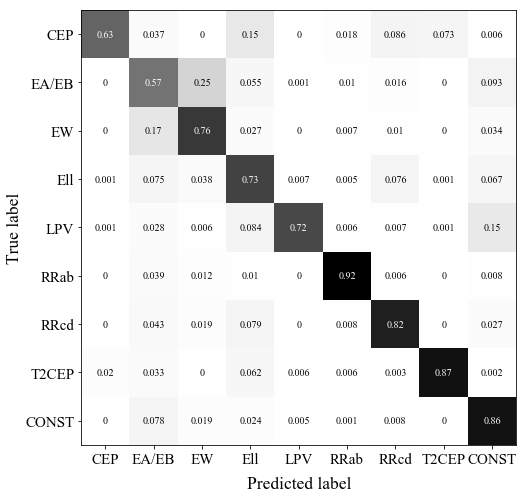

In [3]:
from initial_classif.classifier.classifier import ConfusionMatrixDisplay
CM = np.around(var.cm/np.nansum(var.cm,axis=1)[:,np.newaxis], decimals=3)
cp=np.vstack([CM[0],CM[2:],CM[1]])
cp=np.vstack([cp.T[0],cp.T[2:],cp.T[1]]).T           
               
displ = ConfusionMatrixDisplay(
    confusion_matrix=cp,
        display_labels=['CEP', 'EA/EB', 'EW', 'Ell', 'LPV', 'RRab', 'RRcd', 'T2CEP',
                       'CONST'])
# disp = displ.plot(include_values=True, cmap=plt.cm.Blues, 
#                   ax=None, xticks_rotation='horizontal',
#                   values_format=None,colorbar=False)

displ=pplt(displ,figsize=[8,8])
fig = displ.figure_
ax = displ.ax_
im = displ.im_
fig.set_size_inches(8,8)
ax.set_xlabel('Predicted label',family='serif', fontsize=17.5, labelpad=10)
ax.set_ylabel('True label',family='serif', fontsize=17.5, labelpad=2)
#ax.tick_params(labelsize=15)
import matplotlib
ticks_font = matplotlib.font_manager.FontProperties(family='serif',
                                                            style='normal', size=15,
                                                            weight='normal', stretch='normal')
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
# plt.savefig('confusion_matrix.pdf',bbox_inches='tight')

In [5]:
ft=[]
vd=[]
for ii in var.feature_importance.keys():
    if ii[-2:]=='_x':
        ft+=[ii[:-2]]
        vd+=['%0.3f'%np.sqrt(var.feature_importance[ii]*var.feature_importance[ii[:-2]+'_y'])]
    elif ii[-2:]=='_y':
        continue
    else:
        ft+=[ii]
        vd+=['%0.3f'%var.feature_importance[ii]]
asd = np.argsort(np.array(vd))[::-1]
for ii in range(len(vd)):
    print(np.array(ft)[asd][ii],np.array(vd)[asd][ii])

lsq_period 0.078
amp_double_1 0.055
amplitude 0.050
log10_fap 0.045
JK_col 0.045
model_amplitude 0.041
amp_0 0.038
ks_mad 0.037
ks_p95_p5 0.034
pow_mean_disp 0.029
max_pow 0.026
ks_mad_over_error 0.025
ks_p84_p16 0.024
normed_delta_loglik 0.021
amp_double_3 0.021
a1_a3_double 0.016
ks_p75_p25_over_error 0.014
phi1_phi0 0.012
HK_col 0.012
a0_a2 0.011
a0_a1 0.011
ks_stetson_i 0.011
ks_stetson_j 0.010
peak_ratio_model 0.010
ks_stdev 0.009
ks_p99_p1_over_error 0.009
amp_1 0.008
ks_p84_p16_over_error 0.008
a0_a1_double 0.008
a0_a3_double 0.008
ks_p100_p0_over_error 0.007
Z_model 0.007
ks_stdev_over_error 0.007
ks_p99_p1 0.007
ks_p75_p25 0.007
phi2_phi0 0.007
ks_p95_p5_over_error 0.007
J_model 0.007
Y_scale 0.006
phi3_phi1_double 0.006
ks_eta 0.006
a1_a2_double 0.006
amp_double_2 0.005
max_phase_lag 0.005
a0_a3 0.005
amp_double_0 0.005
beyondfrac 0.005
ks_kurtosis 0.005
ks_p100_p0 0.005
Y_model 0.005
Z_scale 0.005
J_scale 0.005
amp_2 0.005
phi2_phi1 0.005
amp_3 0.005
phi1_phi0_double 0.004
H

In [6]:
def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['var_class']=='EW']*=2
    
    return period_out
    

In [7]:
def add_day_alias_lines_G(centre=np.log10(80.),centre2=np.log10(72.),
                     year_alias_label=False):
    print(year_alias_label)
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    plt.plot(xx, xx, color='gray')
    
    for ii in [1. / 2., 2.]:
        plt.plot(xx, np.log10(ii) + xx, color='k', alpha=0.2, ls='dashed')
        
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
    plt.annotate('1:2',
                 xy=(centre + np.log10(2.), centre),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)
    
    plt.annotate('2:1',
                 xy=(centre2, centre2 + np.log10(2.)),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)
    
    if year_alias_label:
        plt.annotate('day alias',
                     xy=(np.log10(.3), np.log10(1. / (1. / .3 + 1. / 1.) + .12)),
                     fontsize=12.,
                     rotation=35.,
                     xycoords='data',
                     alpha=0.5,
                     color='r')
        plt.annotate('day alias',
                     xy=(np.log10(.3), np.log10(1. / (1. / .3 - 1. / 1.) + .12)),
                     fontsize=12.,
                     rotation=52.,
                     xycoords='data',
                     alpha=0.5,
                     color='r')

In [8]:
def add_double_lines(centre,centre2):
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    plt.plot(xx, xx, color='gray')
    
    for ii in [1. / 2., 2.]:
        plt.plot(xx, np.log10(ii) + xx, color='k', alpha=0.2, ls='dashed')
        
    plt.annotate('1:2',
                 xy=(centre + np.log10(2.), centre),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)
    
    plt.annotate('2:1',
                 xy=(centre2, centre2 + np.log10(2.)),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)

def add_year_alias_red():

    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 365))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 365))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
def add_day_alias_red():
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
        
def add_half_day_alias_red():
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 2.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 2.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')

In [9]:
def add_day_G():
    plt.axhline(np.log10(1.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 2.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 3.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 4.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 5.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 2.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 3.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 4.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 5.), ls='dashed', zorder=-60, alpha=0.3)

In [10]:
def add_vline(x):
    plt.axvline(np.log10(x), ls='dashed', zorder=-60, alpha=0.3)
def add_hline(x):
    plt.axhline(np.log10(x), ls='dashed', zorder=-60, alpha=0.3)

def add_annotate(l,x,y):
    plt.annotate(
        l,
        xy=(np.log10(x), np.log10(y)),
        xycoords='data',
        ha='right',
        va='bottom',
        fontsize=12.,
        color=sns.color_palette()[0],
    )
    plt.annotate(l,
                 xy=(np.log10(y), np.log10(x)),
                 xycoords='data',
                 ha='right',
                 va='top',
                 fontsize=12.,
                 color=sns.color_palette()[0],
                 rotation=90)
    
def add_year_G(year_labels=False):
    
    [add_hline(365./ii) for ii in range(1,5)]
    [add_vline(365./ii) for ii in range(1,5)]
    
    add_annotate('1 year', 980., 365.)
    
    for ii in range(2, 5):
        add_annotate('1/%i year' % ii, 980., 365./ii)

In [11]:
from matplotlib.ticker import ScalarFormatter, LogLocator
from matplotlib.colors import PowerNorm
import sys
import seaborn as sns
sys.path.append('../../../')
from lc_utils import add_alias_lines, add_year_grid
from matplotlib.colors import PowerNorm

def make_one_to_one_plot(var_dataset,literature='Matsunaga et al. (2009)',with_ylabels=True,
                        xlim=[0.1,1000],bins=50,points=True,
                        ticks=np.array([0.1,0.2,0.5,1,2,5,10,20,100,200,500,1000]),
                        year_alias_label=False,
                        year_labels=False):
    f,a=plt.subplots(2,1,figsize=[5.6*5.5/7.,7.*5.5/7.],
                     gridspec_kw={'height_ratios':[1.,0.2]})

    
    plt.subplots_adjust(hspace=0.02,wspace=0.02)
    plt.sca(a[0])
    xx = np.linspace(0.,3000.)
    if not points:
        plt.hist2d(var_dataset['cat_period'],
                   period_fix(var_dataset),
                   bins=[np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins),
                         np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins)],
                   range=[xlim,xlim],
                   cmap=plt.cm.Greys,
                   norm=LogNorm(),
                   zorder=50
                  )
    else:
        from scipy.stats import gaussian_kde
        xy = np.vstack([np.log(period_fix(var_dataset))/0.05,
                   (var_dataset['cat_period']/period_fix(var_dataset)-1)/0.001])
        z = np.log10(gaussian_kde(xy,bw_method=0.01)(xy))
        idx = z.argsort()
        plt.scatter(np.log10(var_dataset['cat_period'].values[idx]),
                   np.log10(period_fix(var_dataset)[idx]),c=z[idx],zorder=50,
                   s=100./np.sqrt(len(var_dataset)),
                   cmap=plt.cm.inferno,vmax=np.max(z)*0.95,rasterized=True)
        
    plt.xlim(*np.log10(xlim))
    plt.ylim(*np.log10(xlim))
    plt.gca().set_xticklabels([])
    plt.gca().set_aspect('equal')
    if with_ylabels:
        plt.ylabel('VVV period [day]')
    else:
        plt.gca().set_yticklabels([])
        
    plt.title(literature,fontsize=16)
        
    plt.sca(a[1])
    
    cmap = plt.cm.Greys
    cmap.set_under(alpha=0.)
    if not points:
        plt.hist2d(var_dataset['cat_period'],
                   (var_dataset['lsq_period']/var_dataset['cat_period']-1)*100.,
                   bins=[np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins),
                         np.linspace(-120,120,bins)],
                   range=[xlim,xlim],
                   cmap=cmap,
                   norm=LogNorm(),
                   zorder=50,
                   vmin=2
                  )
    else:
        plt.scatter(np.log10(var_dataset['cat_period'].values[idx]),
                 ((period_fix(var_dataset)/var_dataset['cat_period']-1)*100).values[idx],
                    c=z[idx],zorder=50,
               s=100./np.sqrt(len(var_dataset)),
               cmap=plt.cm.inferno,vmax=np.max(z)*0.95,rasterized=True)
    
    plt.xlabel('Literature period [day]')
    plt.ylim(-120.,120.)
    plt.xlim(*np.log10(np.array(xlim)))
#     plt.semilogx()
    
    plt.gca().xaxis.set_major_locator(LogLocator(subs=(0.5,1.,2.)))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())
    if with_ylabels:
        plt.ylabel('% diff.')
    plt.axhline(0.,alpha=0.3,color='k',ls='dashed',zorder=-2)
    a[0].set_xticklabels([])
    plt.sca(a[0])
    def fmtt(t):
        if t<2.:
            return '%0.1f'%t
        else:
            return '%i'%t
    
    plt.yticks(np.log10(ticks)[(ticks>xlim[0])&(ticks<=xlim[1])],
               [fmtt(t) for t in ticks[(ticks>xlim[0])&(ticks<=xlim[1])]]);
    plt.sca(a[1])
    plt.xticks(np.log10(ticks)[(ticks>xlim[0])&(ticks<=xlim[1])],
               [fmtt(t) for t in ticks[(ticks>xlim[0])&(ticks<=xlim[1])]]);
    if not with_ylabels:
        a[0].set_yticklabels([])
        a[1].set_yticklabels([])
    return a

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


Text(2.0, 2.306930550226673, 'year alias')

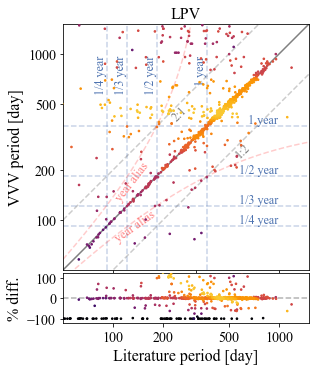

In [17]:
ax=make_one_to_one_plot(var_dataset_lF[(var_dataset_lF['var_class']=='LPV')],
                    xlim=[50.,1500.1],bins=60,literature='LPV',points=True,
                    year_alias_label=True)
plt.sca(ax[0]);
add_year_alias_red();
add_year_G();
# add_alias_lines_G();
add_double_lines(np.log10(265.),np.log10(220.))
plt.annotate('year alias',
             xy=(np.log10(100.), np.log10(1. / (1. / 100. + 1. / 365.) + 25.)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('year alias',
             xy=(np.log10(100.), np.log10(1. / (1. / 100. - 1. / 365.) + 65.)),
             fontsize=12.,
             rotation=52.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_lpv.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


Text(-0.1870866433571444, 0.7781512503836436, 'day alias')

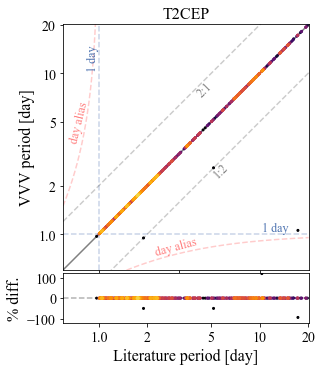

In [13]:
ax=make_one_to_one_plot(var_dataset_lF[(var_dataset_lF['var_class']=='T2CEP')],
                    xlim=[0.6,20.1],bins=100,literature='T2CEP',
                    points=True)
plt.sca(ax[0]);#add_alias_lines_G()
add_double_lines(np.log10(2.5),np.log10(4.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 15., 1.)
plt.annotate('day alias',
             xy=(np.log10(2.2), np.log10(1. / (1. / .5 + 1. / 1.) + .53)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(0.65), np.log10(1. / (1. / .5 - 1. / 1.) + 5.)),
             fontsize=12.,
             rotation=76.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_t2cep.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


Text(-0.3979400086720376, 0.3424226808222063, 'day alias')

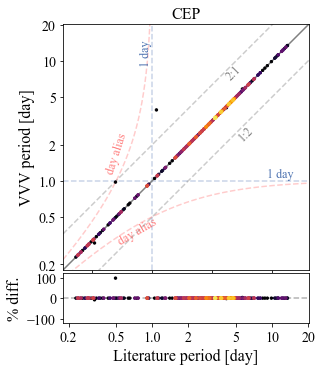

In [14]:
ax=make_one_to_one_plot(var_dataset_lF[(var_dataset_lF['var_class']=='CEP')],
                    xlim=[0.18,20.1],bins=100,literature='CEP',
                    points=True)
plt.sca(ax[0]);#add_alias_lines_G()
add_double_lines(np.log10(2.5),np.log10(4.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 15., 1.)
plt.annotate('day alias',
             xy=(np.log10(.5), np.log10(1. / (1. / .5 + 1. / 1.) + .1)),
             fontsize=12.,
             rotation=30.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.4), np.log10(1. / (1. / .5 - 1. / 1.) + 1.2)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_cep.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


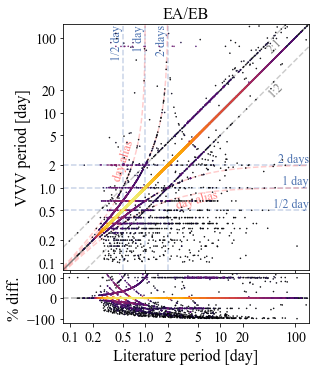

In [105]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='EA/EB'],
                    xlim=[0.08,150.1],bins=200,literature='EA/EB',
                    points=True)
plt.sca(ax[0])
add_double_lines(np.log10(20.5),np.log10(40.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 150., 1.)

add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 150., .5)

add_hline(2.)
add_vline(2.)
add_annotate('2 days', 150., 2.)

plt.annotate('day alias',
             xy=(np.log10(2.5), np.log10(1. / (1. / .5 + 1. / 1.) + .4)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.35), np.log10(1. / (1. / .5 - 1. / 1.) + 2.5)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')
add_half_day_alias_red()
# plt.savefig('period_1to1_eaeb.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


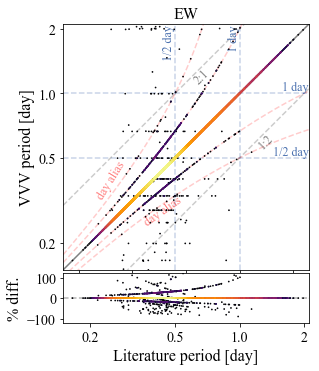

In [106]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='EW'],
                    xlim=[0.15,2.1],bins=100,literature='EW',
                    points=True)

plt.sca(ax[0])
add_double_lines(np.log10(0.6),np.log10(0.6))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 2.1, 1.)

add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 2.1, .5)

add_half_day_alias_red()

plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) -0.025)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.21), np.log10(1. / (1. / .5 - 1. / 1.) -0.55)),
             fontsize=12.,
             rotation=58.,
             xycoords='data',
             alpha=0.5,
             color='r')
# plt.savefig('period_1to1_ew.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


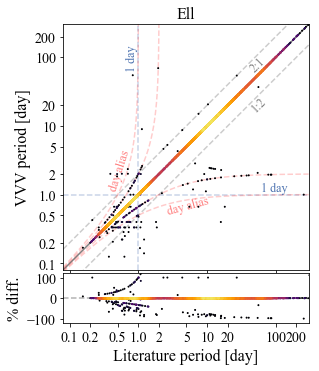

In [107]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='Ell'],
                    xlim=[0.08,300.1],bins=100,literature='Ell',
                    points=True)
plt.sca(ax[0])
add_double_lines(np.log10(20.5),np.log10(40.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 150., 1.)

add_half_day_alias_red()

plt.annotate('day alias',
             xy=(np.log10(2.5), np.log10(1. / (1. / .5 + 1. / 1.) + .4)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.35), np.log10(1. / (1. / .5 - 1. / 1.) + 2.5)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_ell.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


Text(-0.5228787452803376, -0.1739251972991736, 'day alias')

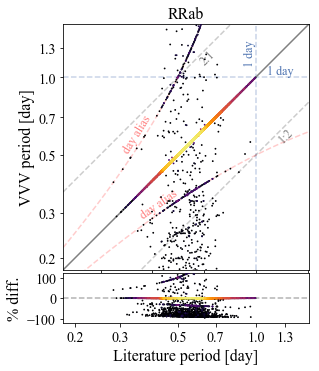

In [18]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='RRab'],
                    xlim=[0.18,1.6],bins=100,literature='RRab',points=True,
                    ticks=np.array([0.2,0.3,0.5,0.7,1.,1.3]))
plt.sca(ax[0])
add_double_lines(np.log10(0.6),np.log10(0.6))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 1.4, 1.)
plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) + 0.015)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.3), np.log10(1. / (1. / .5 - 1. / 1.) -0.33)),
             fontsize=12.,
             rotation=58.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_rrab.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


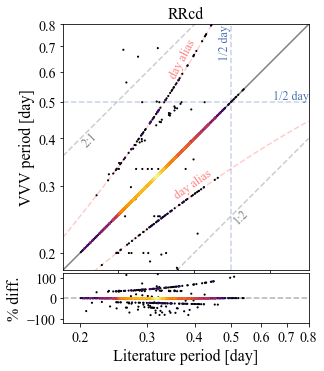

In [109]:
ax=make_one_to_one_plot(var_dataset_lF[var_dataset_lF['var_class']=='RRcd'],
                    xlim=[0.18,0.8],bins=100,literature='RRcd',points=True,
                    ticks=np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8]))
plt.sca(ax[0])
add_double_lines(np.log10(0.25),np.log10(0.2))
add_day_alias_red()
add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 0.8, .5)
plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) -0.015)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.34), np.log10(1. / (1. / .5 - 1. / 1.) -0.3)),
             fontsize=12.,
             rotation=62.,
             xycoords='data',
             alpha=0.5,
             color='r')

# plt.savefig('period_1to1_rrcd.pdf',bbox_inches='tight',dpi=300)

In [43]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

def get_lightcurve(sourceid):

    lcs = pd.DataFrame(sqlutilpy.get('''
                                select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_train_zyjhk where sourceid={0}'''.format(sourceid),
                     **config.wsdb_kwargs))
    
    if len(lcs)==0:

        lcs = pd.DataFrame(sqlutilpy.get('''
                                    select sourceid, 
                                    unnest(mjdobs) as mjdobs,
                                    unnest(mag) as mag,
                                    unnest(emag) as emag,
                                    unnest(filterid) as filterid,
                                    unnest(chi) as chi,
                                    unnest(ast_res_chisq) as ast_res_chisq,
                                    unnest(ambiguous_match) as ambiguous_match  
                                    from leigh_smith.virac2_ts_tmolnar_variables where sourceid={0}'''.format(sourceid),
                         **config.wsdb_kwargs))
    
    return lcs


 ·············


In [47]:
import sys
import sqlutilpy
sys.path.append('../')
from fine_classif.feat_extract.compute_feats import correct_to_HJD, fourier_poly_chi2_fit_full, \
    retrieve_fourier_poly, LombScargle
from fine_classif.feat_extract.compute_feats import sigclipper, \
optimum_regularization, check_significant_second_minimum, find_phase_of_minimum

In [19]:
def plot_lightcurve(clss='RRab',ii=105,ax=None,reg=True):
    fltr = (var_dataset['class']==clss)&(var_dataset['prob']>0.9)&(var_dataset['ks_b_ivw_mean_mag']<14.)
    sid,per,clss=var_dataset['sourceid'].values[fltr][ii],period_fix(var_dataset)[fltr][ii],var_dataset['class'].values[fltr][ii]
    cper = var_dataset['cat_period'].values[fltr][ii]
    prb = var_dataset['prob'].values[fltr][ii]
    print(var_dataset['var_class'].values[fltr][ii])
    print('LSQ period', var_dataset['lsq_period'].values[fltr][ii])
    print(var_dataset['significant_second_minimum'].values[fltr][ii])
    print('corrected LSQ period', period_fix(var_dataset)[fltr][ii])
    print(sid)
    print('Cat period', cper)
    results_d, lc=plot_lc_sid(sid, var_dataset['ra'].values[ii], var_dataset['dec'].values[ii],per,
                var_dataset['lsq_nterms'].values[ii], cper, ax=ax, reg=reg)
    plt.title('%s, classif. prob.=%0.4f'%(clss,prb),loc='left',fontsize=18)
    return results_d, lc
    
def plot_lc_sid(sid,ra,dec,per,nterms,cper,ax=None,reg=True):
    lc=get_lightcurve(sid)
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
    lc = sigclipper(lc[clean])

    correct_to_HJD(lc,
                 ra,
                 dec)

    tt = lc['HJD'].values[np.argmin(np.abs(lc['mag'].values-np.nanpercentile(lc['mag'],98.)))]

    model = LombScargle(lc['HJD'].values-tt, lc['mag'].values, 
                        lc['emag'].values, normalization='standard')
    freq, power = model.autopower(maximum_frequency=10.)

    if ax is None:
        f,ax=plt.subplots(2,1,figsize=[5.,5.5],gridspec_kw={'height_ratios':[1.,0.3]})
    plt.sca(ax[0])
    plt.errorbar((((lc['HJD'].values-tt)%(2.*per))/per),
                 lc['mag'].values,
                 yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.ylim(np.nanmean(lc['mag'].values)-0.3,np.nanmean(lc['mag'].values)+0.3)
    plt.gca().invert_yaxis()
    plt.xlim(-0.1,2.1)
    # plt.ylim(-0.5,0.5)
    plt.xlabel('Phase')
    plt.ylabel(r'$K_s$ [mag]')
#     nterms=combo_dset['lsq_nterms'].values[fltr][ii]
    opt_reg=0
    if reg:
        opt_reg=optimum_regularization(lc['mag'].values, lc['emag'].values)
    print(opt_reg)
    results_d = fourier_poly_chi2_fit_full(
                                             times=lc['HJD'].values-tt,
                                             mag=lc['mag'].values,
                                             err=lc['emag'].values,
                                             freq_dict={'freq_grid':np.array([1./per])},
                                             nterms=np.int64(nterms),
                                             npoly=3,
                                             regularization=opt_reg,
                                             time_zeropoint_poly=0.,
                                             regularize_by_trace = True,
                                             check_multiples=False, 
                                             use_power_of_2=False,
                                             return_period_error=False)
    print(find_phase_of_minimum(results_d))
    print(check_significant_second_minimum(results_d, 
                                          find_phase_of_minimum(results_d)))
    
    xx=np.linspace(-0.1*per,2.1*per,1000)
    FF = retrieve_fourier_poly(xx,
                               results_d)
    plt.plot(xx/per, FF,color='#FFA500',lw=3)

    plt.sca(ax[1])
    plt.plot(1./freq,power,color='#FFA500',lw=0.6)
    plt.xlim(np.max([per*0.2,0.1]),per*5.)
    plt.semilogx()

    plt.gca().xaxis.set_major_locator(LogLocator(subs=(0.5,1.,2.)))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())

    plt.axvline(per,color='gray',ls='dashed',alpha=0.5,lw=3,zorder=-10)
    plt.axvline(per/2.,color='gray',ls='dashed',alpha=0.2,lw=3,zorder=-10)

    plt.annotate('Period=%0.4f days'%per,xy=(0.98,0.95),ha='right',va='top',xycoords='axes fraction',
                fontsize=15)
    
    plt.xlabel('Period [days]')
    plt.ylabel('LS Power')
    plt.ylim(0.,)
    plt.subplots_adjust(hspace=0.32)
    plt.sca(ax[0])
    
#     plt.figure()
#     plt.errorbar((((lc['HJD'].values-tt))),
#                  lc['mag'].values,
#                  yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.gca().invert_yaxis()
#     plt.xlabel('Phase')
#     plt.ylabel(r'$K_s$ [mag]')
#     xx = np.linspace(*np.nanpercentile(lc['HJD'].values-tt,[0.,100.]),1000)
#     FF = retrieve_fourier_poly(xx,
#                                results_d)
#     plt.plot(xx, FF,color='#FFA500',lw=3)
    
#     plt.figure()
#     plt.errorbar((((lc['HJD'].values-tt) % (2.*cper))),
#                  lc['mag'].values,
#                  yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.gca().invert_yaxis()
# #     plt.xlim(-0.1,2.1)
#     # plt.ylim(-0.5,0.5)
#     plt.xlabel('Phase')
#     plt.ylabel(r'$K_s$ [mag]')
#     opt_reg=0
#     if reg:
#         opt_reg=optimum_regularization(lc['mag'].values, lc['emag'].values)
#     print(opt_reg)
#     results_d = fourier_poly_chi2_fit_full(
#                                              times=lc['HJD'].values-tt,
#                                              mag=lc['mag'].values,
#                                              err=lc['emag'].values,
#                                              freq_dict={'freq_grid':np.array([1./cper])},
#                                              nterms=np.int64(nterms),
#                                              npoly=3,
#                                              regularization=opt_reg,
#                                              time_zeropoint_poly=0.,
#                                              regularize_by_trace = True,
#                                              check_multiples=False, 
#                                              use_power_of_2=False,
#                                              return_period_error=False)
    
#     xx=np.linspace(-0.1*cper,2.1*cper,1000)
# #     xx = np.linspace(*np.nanpercentile(lc['HJD'].values-tt,[0.,100.]),1000)
#     FF = retrieve_fourier_poly(xx,
#                                results_d)
#     plt.plot(xx, FF,color='#FFA500',lw=3)
    return results_d, lc
    # plt.plot((lc['mjdobs'][clean]%(cper)/cper),lc['mag'][clean]-np.nanmedian(lc['mag'][clean]),'.')

In [21]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(var_dataset_lF['cat_period'].values/period_fix(var_dataset_lF)-1)>0.1)\
    &(var_dataset_lF['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/
                      np.count_nonzero((var_dataset_lF['var_class']==ii))))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


EW 24.31
EA/EB 41.80
RRab 6.00
RRcd 24.32
Ell 25.46
CEP 6.04
T2CEP 2.68
LPV 64.59


In [22]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(var_dataset['cat_period'].values/period_fix(var_dataset)-1)>0.1)\
    &(var_dataset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/
                      np.count_nonzero((var_dataset['var_class']==ii))))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


EW 24.37
EA/EB 41.84
RRab 5.98
RRcd 24.31
Ell 25.51
CEP 6.12
T2CEP 2.41
LPV 63.95


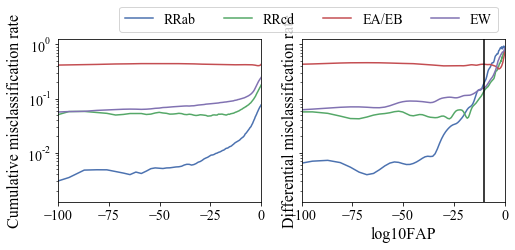

In [70]:
from scipy.ndimage import gaussian_filter1d

f,a=plt.subplots(1,2,figsize=[8.,3.],sharey=True,sharex=True)

for ii, kk in enumerate(['RRab','RRcd','EA/EB','EW']):
    bb = np.nanpercentile(var_dataset['log10_fap_ls'],np.linspace(0.,100.,150))
    n,b=np.histogram(var_dataset['log10_fap_ls'][(var_dataset['var_class']==kk)&~(var_dataset['class']==kk)],bins=bb)
    n2,b=np.histogram(var_dataset['log10_fap_ls'][(var_dataset['var_class']==kk)],bins=bb)
    plt.sca(a[0])
    plt.ylabel('Cumulative misclassification rate')
    plt.plot(.5*(b[1:]+b[:-1]),np.cumsum(n)/np.cumsum(n2),color=sns.color_palette(n_colors=8)[ii])
    plt.sca(a[1])
    plt.plot(.5*(b[1:]+b[:-1]),gaussian_filter1d(n/n2,2.),color=sns.color_palette(n_colors=8)[ii],
            label=kk)
    
plt.legend(ncol=4,bbox_to_anchor=(1.,1.),loc='lower right')
plt.semilogy()
plt.xlabel('log10FAP')
plt.ylabel('Differential misclassification rate')
plt.xlim(-100,0)
plt.axvline(-10,color='k')

In [73]:
var_dataset['phase_lag_mean']

0          3.904981
1          3.171314
2          4.550526
3          3.380096
4          4.502369
5          3.213642
6          3.164519
7          3.553331
8          4.111546
9          6.330552
            ...    
437098     6.167934
437099     6.183717
437100     9.171436
437101    10.584796
437102     9.623978
437103     8.700844
437104     9.220858
437105     5.664042
437106     9.700521
437107     7.527080
Name: phase_lag_mean, Length: 437108, dtype: float64